# Contents 
Jump to a section you're interested in! 

### Methodology and high-level stats 
[Overview of gender distribution in the MoMA Artists collection](###-Gender-proportion-in-artists)

### Explore specific questions
[1. How many artworks does each artist have?](###-Q1:-How-many-artworks-does-each-artist-have?)

#### Temporal analysis (timeline)
[Recognition lag for female artists?](##-Recognition-lag)


In [427]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Notes on column names 

* Wiki QID = a unique identifier on Wikidata, which is a database used by Wikipedia and other Wikimedia projects

* ULAN = Getty Union List of Artist Names. A vocabulary of names, biographies, and other metadata about artists, architects, and other people involved in art and architecture.

In [428]:
# link to github repo datasets
artist_url = "https://github.com/MuseumofModernArt/collection/blob/main/Artists.csv?raw=true"
artwork_url = "https://github.com/MuseumofModernArt/collection/blob/main/Artworks.csv?raw=true"
# exhibition data was last updated 8 years ago, so instead of dynamically fetching data we will just use the one downloaded in the data folder. 

# read csv 
artist_df = pd.read_csv(artist_url)
exhibitions_df = pd.read_csv("exhibitions.csv", encoding='latin-1')

## write data out to json 
# exhibitions_df.to_json('exhibitions.json', index=False)
# exhibitions_df.to_csv('exhibitions.csv', index=False)
# artist_df.to_csv('artist.csv', index=False)
# artist_df.to_json('artist.json', index=False)

### Main stats

In [429]:
# Count unique number of artists and exhibitions in the datasets
unique_artist = artist_df['ConstituentID'].nunique()
unique_exhibitions = exhibitions_df['ExhibitionID'].nunique()
print(f"Number of unique artists: {unique_artist}")
print(f"Number of unique exhibitions: {unique_exhibitions}")

Number of unique artists: 15639
Number of unique exhibitions: 1727


### Gender proportions in artists

In [430]:
gender_counts = artist_df['Gender'].value_counts(dropna=False)
print(gender_counts)
print("")

# Create main categories
confirmed_female = artist_df[artist_df['Gender'] == 'female']
confirmed_male = artist_df[artist_df['Gender'] == 'male']
unknown_gender = artist_df[artist_df['Gender'].isnull()]

confirmed_female_count = len(confirmed_female)
confirmed_male_count = len(confirmed_male)
unknown_gender_count = len(unknown_gender)

# two ways of calculating percentage: 
# counting female out of known gendered artists
confirmed_female_percentage = confirmed_female_count / len(artist_df[artist_df['Gender'].notna()]) * 100
# counting female out of all artists, including those with unknown gender 
confirmed_female_percentage_2 = confirmed_female_count / unique_artist * 100

print(f"Confirmed female count: {confirmed_female_count}")
print(f"Confirmed male count: {confirmed_male_count}")
print(f"Unknown gender count: {unknown_gender_count}")
print(f"Female percentage out of confirmed: {confirmed_female_percentage:.2f}%")
print(f"Female percentage out of all artists: {confirmed_female_percentage_2:.2f}%")

# sanity check on math 
if ((confirmed_female_count + confirmed_male_count + unknown_gender_count + 6 == unique_artist)):
    print("number adds up!")


Gender
male                     9941
NaN                      3257
female                   2435
non-binary                  3
gender non-conforming       1
transgender woman           1
female (transwoman)         1
Name: count, dtype: int64

Confirmed female count: 2435
Confirmed male count: 9941
Unknown gender count: 3257
Female percentage out of confirmed: 19.67%
Female percentage out of all artists: 15.57%
number adds up!


In [431]:
# Count occurrences of each value in the 'Gender' column, including empty (NaN) values

# Raw counts 
male_count = artist_df['Gender'].str.lower().str.strip().eq('male').sum()
not_male_count = artist_df['Gender'].str.lower().str.strip().ne('male').sum()
female_count = artist_df['Gender'].str.lower().str.strip().eq('female').sum()
not_female_count = artist_df['Gender'].str.lower().str.strip().ne('female').sum()

female_ratio = (1-(not_female_count / unique_artist)) * 100
not_male_ratio = not_male_count / unique_artist * 100
not_female_ratio = not_female_count / unique_artist * 100

# Display the result
print(f"Number of artists not categorized as 'male': {not_male_count}, = {not_male_ratio:.2f}%")
print(f"Number of artists not categorized as 'female': {not_female_count}, = {not_female_ratio:.2f}%")
print(f"Proportion of artists categorized as 'female': {female_ratio:.2f}%")

Number of artists not categorized as 'male': 5698, = 36.43%
Number of artists not categorized as 'female': 13204, = 84.43%
Proportion of artists categorized as 'female': 15.57%


## Start narrowing down on only female artists

#### 1. Create dataframe of only female artists

In [432]:
confirmed_female_artists = artist_df[artist_df['Gender'] == 'female']
confirmed_female_artists

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Wiki QID,ULAN
8,10,Irene Aronson,"American, born Germany 1918",American,female,1918,0,Q19748568,500042413.0
16,21,Ruth Asawa,"American, 1926–2013",American,female,1926,2013,Q7382874,500077806.0
17,22,Isidora Aschheim,Israeli,Israeli,female,0,0,NaN,NaN
23,28,Geneviève Asse,"French, born 1923",French,female,1923,0,Q1978192,500025324.0
25,31,Dana Atchley,"American, 1941–2000",American,female,1941,2000,NaN,NaN
...,...,...,...,...,...,...,...,...,...
15612,137853,Silvia Rosi,"Italian and Togolese, born 1992",Italian,female,1992,0,NaN,NaN
15617,138111,Ulla Wiggen,"Swedish, born 1942",Swedish,female,1942,0,NaN,NaN
15618,138280,Teresita Brigitte Cochran,"American, born 1975",American,female,1975,0,NaN,NaN
15626,138366,Johanna Unzueta,"Chilean, born 1974 Santiago, Chile. Lives and ...",Chilean,female,1974,0,NaN,NaN


In [433]:
artwork_df = pd.read_csv(artwork_url)

In [434]:
## write artwork dataset to data folder 
# artwork_df.to_csv('artwork.csv', index=False)

In [435]:
# Create a mapping of female artists by ConstituentID
female_artist_ids = confirmed_female['ConstituentID'].tolist()
print(len(female_artist_ids))

2435


In [436]:
artwork_df = artwork_df.dropna(subset=['ConstituentID'])
if (artwork_df['ConstituentID'].isna().sum() == 0):
    print("\nSanity check success -- There are no null constituent IDs in the new artwork DF.")
else:
    print(f"\nSanity check FAILED -- There are {artwork_df['ConstituentID'].isna().sum()} null constituent IDs in the new artwork DF.")

# print(artwork_df['ConstituentID'].isna().sum())


Sanity check success -- There are no null constituent IDs in the new artwork DF.


In [437]:
# # Check for any non-numeric values
# print("Any non-numeric values?")
# print(artwork_df['ConstituentID'].str.contains('[^0-9]').any())

# # Look at a sample of unique values
# print("\nSample of unique ConstituentID values:")
# print(artwork_df['ConstituentID'].unique()[:10])

# # Convert artwork ConstituentID to integer
# # artwork_df['ConstituentID'] = artwork_df['ConstituentID'].astype(int)

In [438]:
# Some artworks are by multiple artists so there are multiple constituentIDs associated with it.
# 1. Handle commas: strip and explode 
artwork_df['ConstituentID'] = artwork_df['ConstituentID'].str.split(',')
artwork_df = artwork_df.explode('ConstituentID') # creates singleton rows 

# 2. remove spaces 
artwork_df['ConstituentID'] = artwork_df['ConstituentID'].str.strip()

# 3. convert to numeric
artwork_df['ConstituentID'] = pd.to_numeric(artwork_df['ConstituentID'], errors='raise')

# 4. filter for female artists
# 4.1 Int64/float64 -> int64 
artwork_df['ConstituentID'] = artwork_df['ConstituentID'].astype('Int64')  # capital 'Int64' allows for NaN values

# 5. Filter artworks for female artists and get count of works
female_artworks = artwork_df[artwork_df['ConstituentID'].isin(female_artist_ids)]

# See findings 
print("Number of artworks by female artists:", len(female_artworks))
print("\nNumber of unique female artists with works:", 
      female_artworks['ConstituentID'].nunique())

Number of artworks by female artists: 23450

Number of unique female artists with works: 2420


In [439]:
female_artworks.to_csv("female_artworks.csv", index=False)

In [440]:
print(confirmed_female_artists[confirmed_female_artists['ConstituentID'] == 8216])

      ConstituentID         DisplayName                    ArtistBio  \
7195           8216  Denise Scott Brown  American, born Zambia, 1931   

     Nationality  Gender  BeginDate  EndDate Wiki QID  ULAN  
7195    American  female       1931        0  Q457718   NaN  


## Q1: How many artworks does each artist have?

In [441]:
works_count = female_artworks.groupby('ConstituentID').size().reset_index(name='artwork_count')
print(len(works_count))
works_count

2420


,ConstituentID,artwork_count
0,10,1
1,21,56
2,22,1
3,28,50
4,31,7
...,...,...
2415,137853,6
2416,138111,2
2417,138280,1
2418,138366,1


In [442]:
# Merge this count back to our confirmed_female dataframe
female_artists_with_work_counts = confirmed_female.merge(
    works_count, 
    left_on='ConstituentID', 
    right_on='ConstituentID',
    how='left'  # Use left merge to keep all female artists, even if they have no works
)

In [443]:
# female_artists_with_work_counts
female_artists_with_work_counts['artwork_count'] = female_artists_with_work_counts['artwork_count'].fillna(0)

In [444]:
# sanity check 
print("\nNumber of NaN values:")
print(female_artists_with_work_counts['artwork_count'].isna().sum())


Number of NaN values:
0


In [445]:
# Basic distribution summary
print("Distribution of artworks per female artist:")
print(female_artists_with_work_counts['artwork_count'].describe())

Distribution of artworks per female artist:
count    2435.000000
mean        9.630390
std        73.940074
min         0.000000
25%         1.000000
50%         2.000000
75%         5.000000
max      3381.000000
Name: artwork_count, dtype: float64


In [446]:
print("\nTop 15 most represented female artists:")
print(female_artists_with_work_counts[['DisplayName', 'Nationality', 'artwork_count']]
      .sort_values(by='artwork_count', ascending=False)
      .head(15))


Top 15 most represented female artists:
                    DisplayName Nationality  artwork_count
88             Louise Bourgeois    American         3381.0
971                 Lilly Reich      German          850.0
367              Dorothea Lange    American          480.0
246          Natalia Goncharova     Russian          292.0
567               Olga Rozanova     Russian          263.0
894         Elaine Lustig Cohen    American          235.0
2239               Marianne Wex      German          214.0
748                Sophie Calle      French          205.0
1951             Flora Manteola   Argentine          201.0
12                  Anni Albers    American          200.0
1952              Josefa Santos   Argentine          184.0
623                  Kiki Smith    American          181.0
1554             Aleksandra Mir    American          175.0
922   Frances Benjamin Johnston    American          159.0
609                Mieko Shiomi    Japanese          146.0


In [447]:
print("\nDistribution brackets:")
brackets = [
    (0, "No artworks"),
    (1, "1 artwork"),
    (2, 5, "2-5 artworks"),
    (6, 10, "6-10 artworks"),
    (11, 50, "11-50 artworks"),
    (51, 100, "51-100 artworks"),
    (101, 500, "101-500 artworks"),
    (501, float('inf'), "501+ artworks")
]
for bracket in brackets:
    if len(bracket) == 2:  # For the 0 and 1 cases
        count = len(female_artists_with_work_counts[female_artists_with_work_counts['artwork_count'] == bracket[0]])
        print(f"{bracket[1]}: {count} artists")
    else:
        count = len(female_artists_with_work_counts[
            (female_artists_with_work_counts['artwork_count'] >= bracket[0]) & 
            (female_artists_with_work_counts['artwork_count'] <= bracket[1])
        ])
        print(f"{bracket[2]}: {count} artists")


Distribution brackets:
No artworks: 15 artists
1 artwork: 1028 artists
2-5 artworks: 822 artists
6-10 artworks: 209 artists
11-50 artworks: 280 artists
51-100 artworks: 52 artists
101-500 artworks: 27 artists
501+ artworks: 2 artists


#### Visualize artworks per artist distributions! 

/Users/susiesyli/miniconda3/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


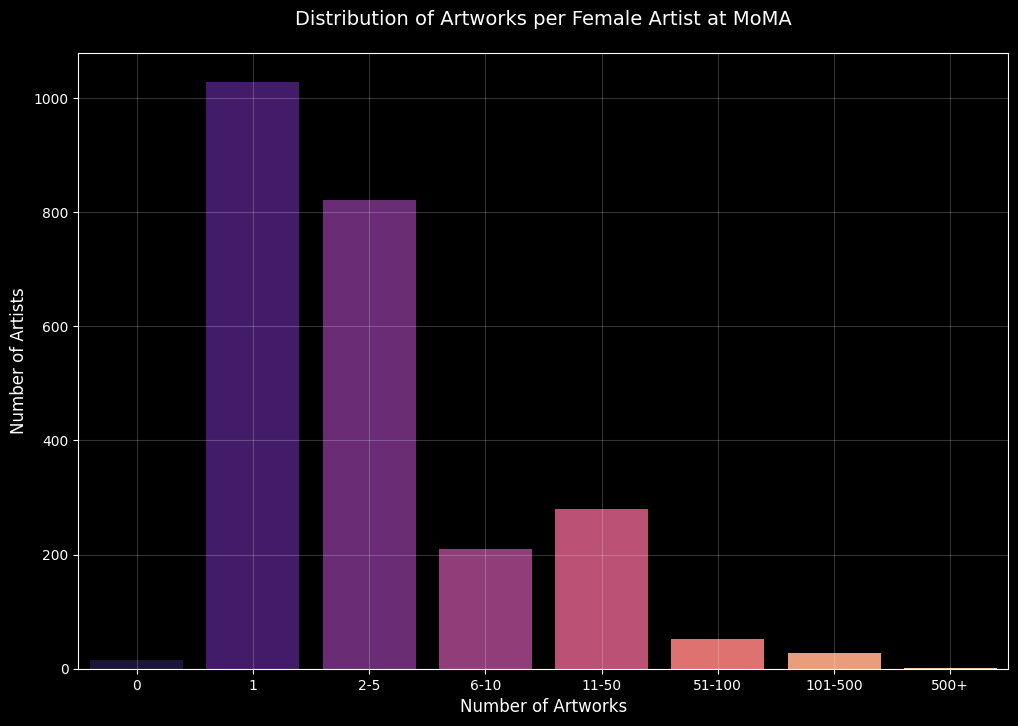


Detailed distribution:
0 artworks: 15 artists (0.6%)
1 artworks: 1028 artists (42.2%)
2-5 artworks: 822 artists (33.8%)
6-10 artworks: 209 artists (8.6%)
11-50 artworks: 280 artists (11.5%)
51-100 artworks: 52 artists (2.1%)
101-500 artworks: 27 artists (1.1%)
500+ artworks: 2 artists (0.1%)


In [448]:
# Set the style
plt.style.use('dark_background')
sns.set_palette("husl")

# Create figure and axis with larger size
plt.figure(figsize=(12, 8))

# Create custom bins
bins = [-1, 0, 1, 5, 10, 50, 100, 500, float('inf')]
labels = ['0', '1', '2-5', '6-10', '11-50', '51-100', '101-500', '500+']

# Create histogram
female_artists_with_work_counts['artwork_range'] = pd.cut(
    female_artists_with_work_counts['artwork_count'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

# Create count plot
sns.countplot(
    data=female_artists_with_work_counts,
    x='artwork_range',
    order=labels,
    palette='magma'
)

# Customize the plot
plt.title('Distribution of Artworks per Female Artist at MoMA', pad=20, fontsize=14)
plt.xlabel('Number of Artworks', fontsize=12)
plt.ylabel('Number of Artists', fontsize=12)

# Rotate x-axis labels
plt.xticks(rotation=0)

# Add grid for better readability
plt.grid(True, alpha=0.2)

# Show the plot
plt.show()

# Print summary statistics
print("\nDetailed distribution:")
distribution = female_artists_with_work_counts['artwork_range'].value_counts().sort_index()
for range_name, count in distribution.items():
    percentage = (count / len(female_artists_with_work_counts)) * 100
    print(f"{range_name} artworks: {count} artists ({percentage:.1f}%)")

## Recognition lag

In [449]:
female_artists_with_work_counts['BeginDate'] = pd.to_numeric(female_artists_with_work_counts['BeginDate'], errors='raise')

female_artworks.loc[:, 'DateAcquired'] = pd.to_datetime(female_artworks['DateAcquired'], format='%Y-%m-%d')

female_artworks

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,Dimensions,CreditLine,AccessionNumber,Classification,Department,DateAcquired,Cataloged,ObjectID,URL,ImageURL,OnView,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
66,"Villa dall'Ava, Paris (Saint-Cloud), France, E...","Rem Koolhaas, Madelon Vriesendorp",6957,"(Dutch, born 1944) (Dutch, born 1945)",(Dutch) (Dutch),(1944) (1945),(0) (0),(male) (female),1987,Synthetic polymer paint and ink on paper,"25 x 39"" (63.5 x 99.1 cm)",Gift of Max Underwood,21.2000,Architecture,Architecture & Design,2000-01-19 00:00:00,Y,82,https://www.moma.org/collection/works/82,https://www.moma.org/media/W1siZiIsIjUzMDUxNyJ...,NaN,NaN,NaN,NaN,63.500100,NaN,NaN,99.060200,NaN,NaN
151,"Slow House Project, North Haven, New York, Pla...","Elizabeth Diller, Ricardo Scofidio, Diller + S...",6951,"(American, born Poland 1954) (American, born 1...",(American) (American) (American),(1954) (1935) (1981),(0) (0) (0),(female) (male) (),1989,Computer-generated print on frosted polymer sh...,"47 5/8 x 36 1/2 x 1 1/2"" (121 x 92.7 x 3.8 cm)...",Marshall Cogan Purchase Fund and Jeffrey P. Kl...,107.1992,Architecture,Architecture & Design,1992-01-15 00:00:00,Y,201,https://www.moma.org/collection/works/201,https://www.moma.org/media/W1siZiIsIjUyNzA0MCJ...,NaN,NaN,3.800000,NaN,121.000000,NaN,NaN,92.700000,NaN,NaN
152,"The Peak Project, Hong Kong, China (Exterior p...",Zaha Hadid,6953,"(British, born Iraq. 1950–2016)",(British),(1950),(2016),(female),1991,Synthetic polymer on paper mounted on canvas,"51 x 72"" (129.5 x 182.9 cm)","David Rockefeller, Jr. Fund",108.1992,Architecture,Architecture & Design,1992-01-15 00:00:00,Y,202,https://www.moma.org/collection/works/202,https://www.moma.org/media/W1siZiIsIjUyNzA0MSJ...,NaN,NaN,NaN,NaN,129.540300,NaN,NaN,182.880400,NaN,NaN
154,"Egg of Columbus Circle project, New York, New ...","Rem Koolhaas, Zoe Zenghelis, Elia Zenghelis, M...",7559,"(Dutch, born 1944) (British, born Greece 1937)...",(Dutch) (British) (British) (Dutch),(1944) (1937) (1937) (1945),(0) (0) (0) (0),(male) (female) (male) (female),1975,Ink and acrylic on paper,"44 1/2 x 27"" (113 x 68.6 cm)",Gift of Kenneth Walker,110.1992,Architecture,Architecture & Design,1992-01-15 00:00:00,Y,204,https://www.moma.org/collection/works/204,https://www.moma.org/media/W1siZiIsIjUyNzA0NCJ...,NaN,NaN,NaN,NaN,113.000000,NaN,NaN,68.600000,NaN,NaN
154,"Egg of Columbus Circle project, New York, New ...","Rem Koolhaas, Zoe Zenghelis, Elia Zenghelis, M...",6957,"(Dutch, born 1944) (British, born Greece 1937)...",(Dutch) (British) (British) (Dutch),(1944) (1937) (1937) (1945),(0) (0) (0) (0),(male) (female) (male) (female),1975,Ink and acrylic on paper,"44 1/2 x 27"" (113 x 68.6 cm)",Gift of Kenneth Walker,110.1992,Architecture,Architecture & Design,1992-01-15 00:00:00,Y,204,https://www.moma.org/collection/works/204,https://www.moma.org/media/W1siZiIsIjUyNzA0NCJ...,NaN,NaN,NaN,NaN,113.000000,NaN,NaN,68.600000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156911,Indio / Traje,Liliana Porter,4703,"(Argentine, born 1941)",(American),(1941),(0),(female),2009,Photogravure,"plate: 15 1/2 × 13 1/4"" (39.4 × 33.7 cm); shee...",Gift of the artist,395.2024,Print,Drawings & Prints,2024-10-28 00:00:00,N,485914,NaN,NaN,NaN,NaN,NaN,NaN,39.370079,NaN,NaN,33.655067,NaN,NaN
156912,Mickey / Novia,Liliana Porter,4703,"(Argentine, born 1941)",(American),(1941),(0),(female),2009,Photogravure,"plate: 15 1/2 × 13 1/4"" (39.4 × 33.7 cm); shee...",Gift of the artist,399.2024,Print,Drawings & Prints,2024-10-28 00:00:00,N,485915,NaN,NaN,NaN,NaN,NaN,NaN,39.370079,NaN,NaN,33.655067,NaN,NaN
156936,Untitled (Drawing for Střelnice [The Shooting ...,Toyen (Marie Čermínová),5916,"(French, born Bohemia. 1902–1980)",(Czech),(1902),(1980),(female),1939,Ink on paper\r,"sheet: 14 

In [450]:
recognition_analysis = female_artworks[['ConstituentID', 'DateAcquired', 'Title', 'Medium']].merge(
    female_artists_with_work_counts[['ConstituentID', 'BeginDate', 'DisplayName']],
    on='ConstituentID'
)
recognition_analysis # print results 

,ConstituentID,DateAcquired,Title,Medium,BeginDate,DisplayName
0,6957,2000-01-19 00:00:00,"Villa dall'Ava, Paris (Saint-Cloud), France, E...",Synthetic polymer paint and ink on paper,1945,Madelon Vriesendorp
1,6951,1992-01-15 00:00:00,"Slow House Project, North Haven, New York, Pla...",Computer-generated print on frosted polymer sh...,1954,Elizabeth Diller
2,6953,1992-01-15 00:00:00,"The Peak Project, Hong Kong, China (Exterior p...",Synthetic polymer on paper mounted on canvas,1950,Zaha Hadid
3,7559,1992-01-15 00:00:00,"Egg of Columbus Circle project, New York, New ...",Ink and acrylic on paper,1937,Zoe Zenghelis
4,6957,1992-01-15 00:00:00,"Egg of Columbus Circle project, New York, New ...",Ink and acrylic on paper,1945,Madelon Vriesendorp
...,...,...,...,...,...,...
23445,4703,2024-10-28 00:00:00,Indio / Traje,Photogravure,1941,Liliana Porter
23446,4703,2024-10-28 00:00:00,Mickey / Novia,Photogravure,1941,Liliana Porter
23447,5916,2024-10-28 00:00:00,Untitled (Drawing for Střelnice [The Shooting ...,Ink on paper\r,1902,Toyen (Marie Čermínová)
23448,8095,2022-05-24 00:00:00,Box catalogue for the exhibition Industriebaut...,cardboard box containing folded leaflet and te...,1934,Hilla Becher


In [451]:
recognition_analysis['DateAcquired'] = pd.to_datetime(recognition_analysis['DateAcquired'])

recognition_analysis['recognition_lag'] = recognition_analysis['DateAcquired'].dt.year - recognition_analysis['BeginDate']

In [452]:
# 1. Average age at which artists had works acquired
print("Average age at acquisition analysis:")
avg_age = recognition_analysis['recognition_lag'].mean()
median_age = recognition_analysis['recognition_lag'].median()
print(f"Mean age at acquisition: {avg_age:.1f} years")
print(f"Median age at acquisition: {median_age:.1f} years")

# Distribution by artist
artist_stats = recognition_analysis.groupby('DisplayName').agg({
    'recognition_lag': ['mean', 'min', 'max', 'count']
}).round(1)

print("\nTop 10 artists by earliest recognition (minimum age at acquisition):")
print(artist_stats.sort_values(('recognition_lag', 'min')).head(10))

# 2. Distribution of recognition lag
print("\nRecognition lag distribution:")
print(recognition_analysis['recognition_lag'].describe())

# 3. Recognition lag over time
# Group by decade of acquisition
recognition_analysis['acquisition_decade'] = recognition_analysis['DateAcquired'].dt.year // 10 * 10
lag_by_decade = recognition_analysis.groupby('acquisition_decade').agg({
    'recognition_lag': ['mean', 'median', 'count']
}).round(1)

# print("\nRecognition lag trends by decade:")
# print(lag_by_decade)

Average age at acquisition analysis:
Mean age at acquisition: 114.2 years
Median age at acquisition: 70.0 years

Top 10 artists by earliest recognition (minimum age at acquisition):
                      recognition_lag                  
                                 mean   min   max count
DisplayName                                            
Robin Schwartz                   17.0   1.0  33.0     2
Barbara Chase-Riboud             50.7  16.0  84.0     6
Betzaida Concepción              16.0  16.0  16.0     2
Annette Rosado                   18.0  16.0  20.0     2
Hiroshi Omae                     20.0  20.0  20.0     1
Graziella Urbinati               22.0  22.0  22.0     4
Roswitha Schuller                22.0  22.0  22.0     1
Regina Maria De Luise            22.0  22.0  22.0     2
Joan Brown                       50.5  22.0  79.0     2
Sylvia Plachy                    72.7  22.0  79.0     9

Recognition lag distribution:
count    22082.000000
mean       114.243818
std        293.

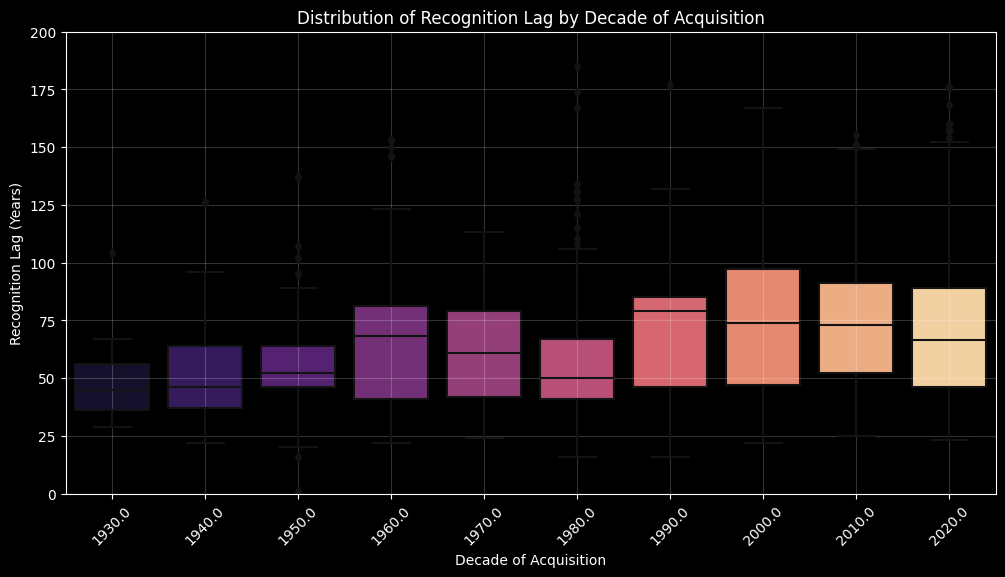


Interesting patterns:
Percentage of works acquired during artist's lifetime: 94.17%
Percentage of works acquired post-mortem: 0.00%


In [453]:
# create a visualization of how this has changed over time
# basic box plot 
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
plt.style.use('dark_background')

# Box plot of recognition lag by decade
sns.boxplot(
    data=recognition_analysis,
    x='acquisition_decade',
    y='recognition_lag',
    palette='magma'
)

#set y axis 
plt.ylim(0, 200) 

plt.title('Distribution of Recognition Lag by Decade of Acquisition')
plt.xlabel('Decade of Acquisition')
plt.ylabel('Recognition Lag (Years)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.2)

plt.show()

# Additional interesting stats
print("\nInteresting patterns:")
print(f"Percentage of works acquired during artist's lifetime: {(recognition_analysis['recognition_lag'] >= 0).mean() * 100:.2f}%")
print(f"Percentage of works acquired post-mortem: {(recognition_analysis['recognition_lag'] < 0).mean() * 100:.2f}%")

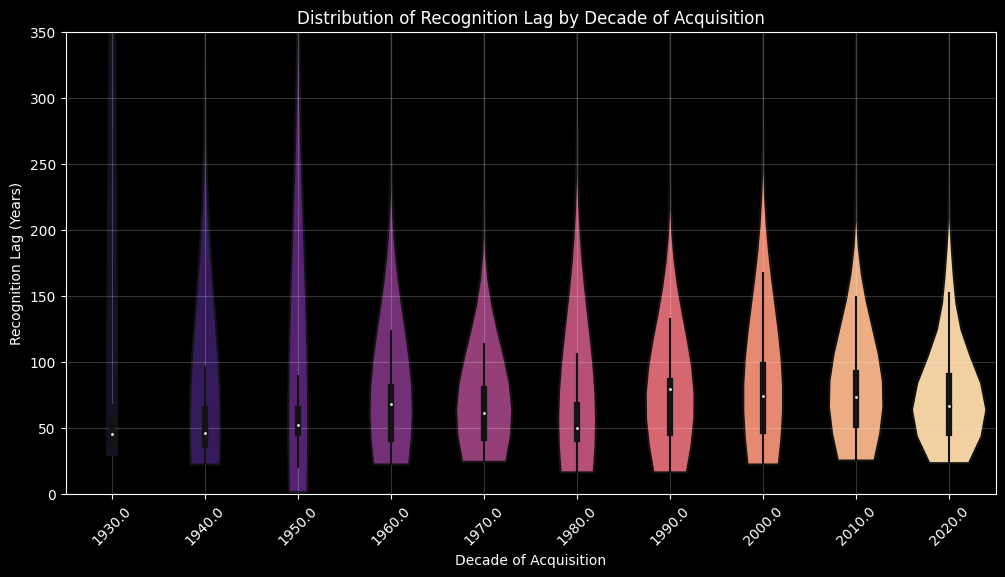

In [454]:
# violin plot 
plt.figure(figsize=(12, 6))
plt.style.use('dark_background')

sns.violinplot(
    data=recognition_analysis,
    x='acquisition_decade',
    y='recognition_lag',
    palette='magma',
    cut=0  # Show full range
)

plt.ylim(0, 350)
plt.title('Distribution of Recognition Lag by Decade of Acquisition')
plt.xlabel('Decade of Acquisition')
plt.ylabel('Recognition Lag (Years)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.2)

plt.show()

/Users/susiesyli/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/susiesyli/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/susiesyli/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


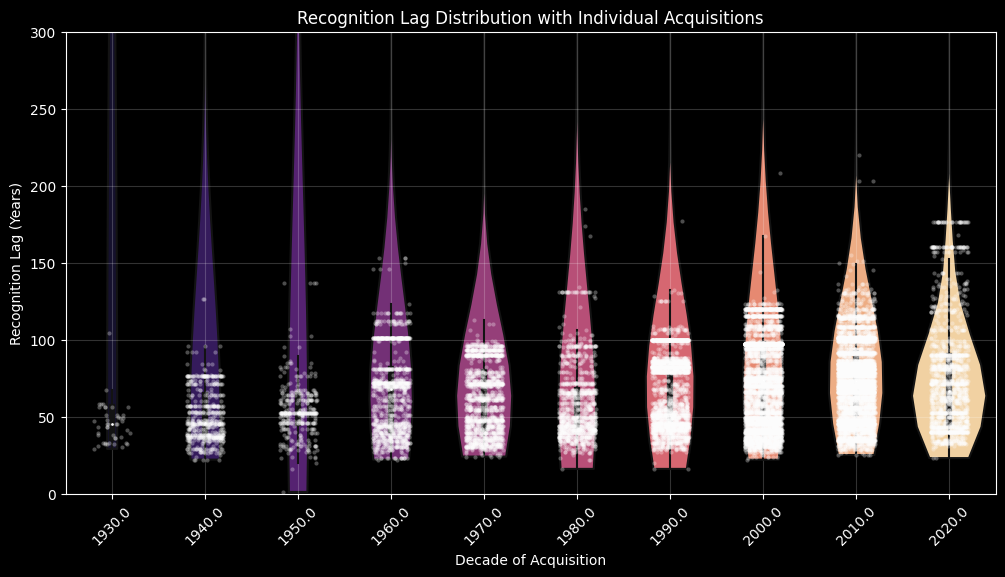

In [455]:
# combine box + violin + scatter plot 
plt.figure(figsize=(12, 6))
plt.style.use('dark_background')

# Violin plot for distribution
sns.violinplot(
    data=recognition_analysis,
    x='acquisition_decade',
    y='recognition_lag',
    palette='magma',
    alpha=0.5,
    cut=0
)

# Strip plot for individual points
sns.stripplot(
    data=recognition_analysis,
    x='acquisition_decade',
    y='recognition_lag',
    size=3,
    alpha=0.3,
    color='white',
    jitter=0.2
)

plt.ylim(0, 300)
plt.title('Recognition Lag Distribution with Individual Acquisitions')
plt.xlabel('Decade of Acquisition')
plt.ylabel('Recognition Lag (Years)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.2)

plt.show()

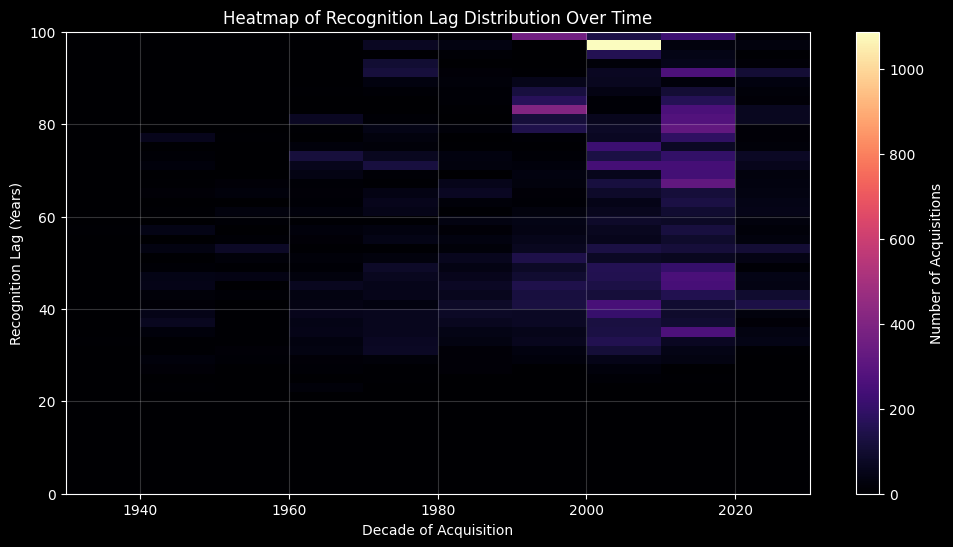

In [456]:
# heat map 
plt.figure(figsize=(12, 6))
plt.style.use('dark_background')

# Create 2D histogram
heatmap_data = np.histogram2d(
    recognition_analysis['acquisition_decade'],
    recognition_analysis['recognition_lag'],
    bins=[10, 50],
    range=[[1930, 2030], [0, 100]]
)

plt.imshow(
    heatmap_data[0].T,
    aspect='auto',
    origin='lower',
    extent=[1930, 2030, 0, 100],
    cmap='magma'
)

plt.colorbar(label='Number of Acquisitions')
plt.title('Heatmap of Recognition Lag Distribution Over Time')
plt.xlabel('Decade of Acquisition')
plt.ylabel('Recognition Lag (Years)')
plt.grid(True, alpha=0.2)

plt.show()

/Users/susiesyli/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/susiesyli/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/susiesyli/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


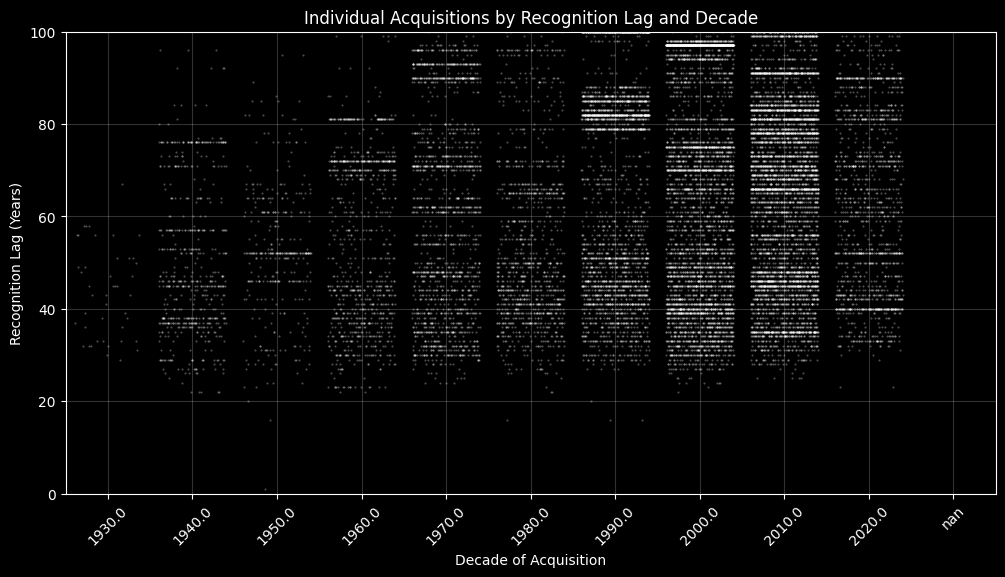

In [457]:
plt.figure(figsize=(12, 6))
plt.style.use('dark_background')

# Strip plot with jitter
sns.stripplot(
    data=recognition_analysis,
    x='acquisition_decade',
    y='recognition_lag',
    size=1.5,
    alpha=0.3,
    color='white',
    jitter=0.4  # Increase jitter to spread points horizontally
)

plt.ylim(0, 100)
plt.title('Individual Acquisitions by Recognition Lag and Decade')
plt.xlabel('Decade of Acquisition')
plt.ylabel('Recognition Lag (Years)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.2)

plt.show()

## Medium-Departpment Classification

In [458]:
unique_departments = female_artworks['Department'].nunique()
print(f"Number of unique departments for female artworks: {unique_departments}, they are:")
print(female_artworks['Department'].unique().tolist())
print("\nDistribution by department:")
dept_counts = female_artworks['Department'].value_counts()
dept_counts

Number of unique departments for female artworks: 8, they are:
['Architecture & Design', 'Drawings & Prints', 'Photography', 'Painting & Sculpture', 'Media and Performance', 'Film', 'Architecture & Design - Image Archive', 'Fluxus Collection']

Distribution by department:


Department
Drawings & Prints                        12561
Photography                               5063
Architecture & Design                     3918
Media and Performance                     1020
Painting & Sculpture                       623
Film                                       157
Fluxus Collection                          104
Architecture & Design - Image Archive        4
Name: count, dtype: int64

In [459]:
female_artists_with_work_counts

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Wiki QID,ULAN,artwork_count,artwork_range
0,10,Irene Aronson,"American, born Germany 1918",American,female,1918,0,Q19748568,500042413.0,1.0,1
1,21,Ruth Asawa,"American, 1926–2013",American,female,1926,2013,Q7382874,500077806.0,56.0,51-100
2,22,Isidora Aschheim,Israeli,Israeli,female,0,0,NaN,NaN,1.0,1
3,28,Geneviève Asse,"French, born 1923",French,female,1923,0,Q1978192,500025324.0,50.0,11-50
4,31,Dana Atchley,"American, 1941–2000",American,female,1941,2000,NaN,NaN,7.0,6-10
...,...,...,...,...,...,...,...,...,...,...,...
2430,137853,Silvia Rosi,"Italian and Togolese, born 1992",Italian,female,1992,0,NaN,NaN,6.0,6-10
2431,138111,Ulla Wiggen,"Swedish, born 1942",Swedish,female,1942,0,NaN,NaN,2.0,2-5
2432,138280,Teresita Brigitte Cochran,"American, born 1975",American,female,1975,0,NaN,NaN,1.0,1
2433,138366,Johanna Unzueta,"Chilean, born 1974 Santiago, Chile. Lives and ...",Chilean,female,1974,0,NaN,NaN,1.0,1


/var/folders/2_/mdjrqzks7tj2_q8gf6cl0s6w0000gn/T/ipykernel_39053/2416030463.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_artworks.loc[:, 'acquisition_decade'] = (pd.to_numeric(


<Figure size 1500x700 with 0 Axes>

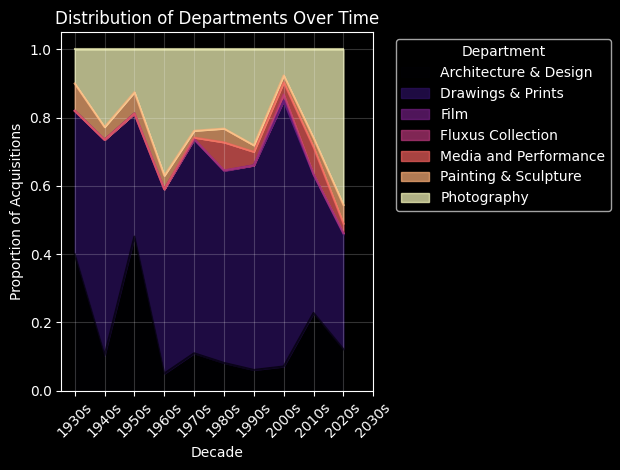

In [463]:
# Convert DateAcquired to just the year by taking first 4 characters
female_artworks.loc[:, 'acquisition_decade'] = (pd.to_numeric(
    female_artworks['DateAcquired'].astype(str).str[:4], 
    errors='coerce'
) // 10 * 10)

# Create the crosstab
dept_by_decade = pd.crosstab(
    female_artworks['acquisition_decade'],
    female_artworks['Department']
)

# Calculate percentages
dept_by_decade_pct = dept_by_decade.div(dept_by_decade.sum(axis=1), axis=0)

# Create plot
plt.figure(figsize=(15, 7))
plt.style.use('dark_background')

dept_by_decade_pct.plot(
    kind='area',
    stacked=True,
    alpha=0.7,
    colormap='magma'
)

all_decades = range(1930, 2031, 10)
plt.xticks(all_decades, [f'{decade}s' for decade in all_decades], rotation=45)

plt.title('Distribution of Departments Over Time')
plt.xlabel('Decade')
plt.ylabel('Proportion of Acquisitions')
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.2)

plt.tight_layout()
plt.show()

## Geographic representation (nationality)

The MoMA represents artists from 80 nations

Distribution by nationality:
Nationality
American     1146
German        154
British       119
French         75
Japanese       61
Brazilian      46
Austrian       44
Russian        41
Italian        41
Canadian       40
Name: count, dtype: int64


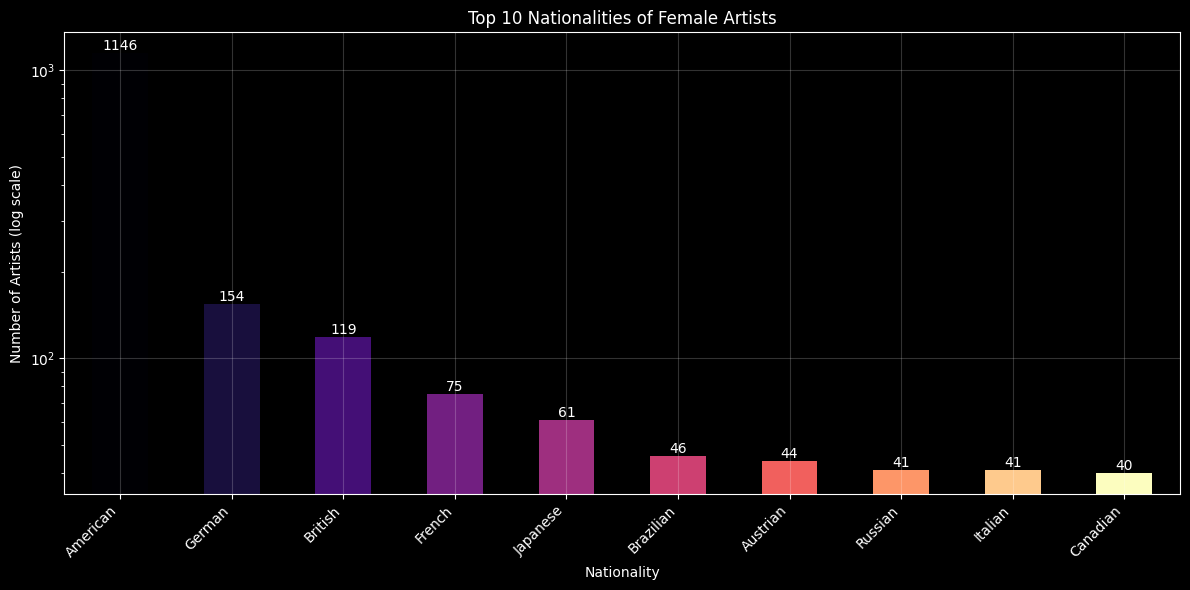

In [486]:
# 2. Geographic Analysis
unique_nationality = female_artists_with_work_counts['Nationality'].nunique()
print(f"The MoMA represents artists from {unique_nationality} nations")

print("\nDistribution by nationality:")
female_artists_with_work_counts.dropna(subset=['Nationality'])
nationality_counts = female_artists_with_work_counts['Nationality'].value_counts()
print(nationality_counts.head(10))

# Visualize nationality distribution
# plt.figure(figsize=(12, 6))
# nationality_counts.head(10).plot(
#     kind='bar',
#     color=plt.cm.magma(np.linspace(0, 1, 10))
# )

# plt.ylim(-5, 1150)

# plt.title('Top 10 Nationalities of Female Artists')
# plt.xlabel('Nationality')
# plt.ylabel('Number of Artists')
# plt.xticks(rotation=45, ha='right')
# plt.grid(True, alpha=0.2)
# plt.tight_layout()
# plt.show()

# Visualize nationality distribution
plt.figure(figsize=(12, 6))
plt.style.use('dark_background')

nationality_counts.head(10).plot(
    kind='bar',
    color=plt.cm.magma(np.linspace(0, 1, 10))
)

plt.title('Top 10 Nationalities of Female Artists')
plt.xlabel('Nationality')
plt.ylabel('Number of Artists (log scale)')  # Changed to indicate log scale
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.2)

# Use log scale for y-axis to better show the distribution
plt.yscale('log')

# Add value labels on top of each bar
for i, v in enumerate(nationality_counts.head(10)):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Artist Career

In [472]:
# mm-dd-yy -> just year (e.g. 1976)
female_artworks.loc[:, 'acquisition_year'] = pd.to_numeric(
    female_artworks['DateAcquired'].astype(str).str[:4], 
    errors='coerce'
)

# Career Analysis
career_analysis = female_artworks.groupby('ConstituentID').agg({
    'acquisition_year': ['min', 'max']
}).reset_index()

career_analysis.columns = ['ConstituentID', 'first_acquisition', 'last_acquisition']

# Merge with artist info
career_analysis = career_analysis.merge(
    female_artists_with_work_counts[['ConstituentID', 'BeginDate', 'DisplayName']],
    on='ConstituentID'
)

# Calculate career spans using just years
career_analysis['time_to_first_acquisition'] = (
    career_analysis['first_acquisition'] - career_analysis['BeginDate']
)
career_analysis['acquisition_span'] = (
    career_analysis['last_acquisition'] - career_analysis['first_acquisition']
)

print("\nCareer Trajectory Statistics:")
print("\nTime to First Acquisition (years):")
print(career_analysis['time_to_first_acquisition'].describe())

print("\nAcquisition Span (years):")
print(career_analysis['acquisition_span'].describe())


Career Trajectory Statistics:

Time to First Acquisition (years):
count    2406.000000
mean      266.613466
std       610.728207
min         1.000000
25%        36.000000
50%        45.000000
75%        75.000000
max      2024.000000
Name: time_to_first_acquisition, dtype: float64

Acquisition Span (years):
count    2406.000000
mean        6.914796
std        15.183007
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max        90.000000
Name: acquisition_span, dtype: float64


In [475]:
print("Sample of career trajectories:")
print("\nDisplayName | Birth Year | First Acquisition | Last Acquisition | Time to First | Acquisition Span")
print("-" * 100)

sample_data = career_analysis.sort_values('acquisition_span', ascending=False).head(10)
for _, row in sample_data.iterrows():
    print(f"{row['DisplayName']:<20} | {row['BeginDate']:<10.0f} | {row['first_acquisition']:<16.0f} | {row['last_acquisition']:<15.0f} | {row['time_to_first_acquisition']:<12.0f} | {row['acquisition_span']:<15.0f}")

# Some basic statistics
print("\nOverall Statistics:")
print(f"Number of artists: {len(career_analysis)}")
print("\nBirth Years:")
print(f"Earliest birth year: {career_analysis['BeginDate'].min():.0f}")
print(f"Latest birth year: {career_analysis['BeginDate'].max():.0f}")
print(f"Median birth year: {career_analysis['BeginDate'].median():.0f}")

print("\nAcquisition Years:")
print(f"Earliest acquisition: {career_analysis['first_acquisition'].min():.0f}")
print(f"Latest acquisition: {career_analysis['last_acquisition'].max():.0f}")
print(f"Median first acquisition year: {career_analysis['first_acquisition'].median():.0f}")

# Identify potentially problematic values
print("\nPotentially problematic values:")
print("Artists with birth year 0:", len(career_analysis[career_analysis['BeginDate'] == 0]))
print("Artists with acquisition before birth:", 
      len(career_analysis[career_analysis['first_acquisition'] < career_analysis['BeginDate']]))

Sample of career trajectories:

DisplayName | Birth Year | First Acquisition | Last Acquisition | Time to First | Acquisition Span
----------------------------------------------------------------------------------------------------
Käthe Kollwitz       | 1867       | 1934             | 2024            | 67           | 90             
Clara E. Sipprell    | 1885       | 1932             | 2021            | 47           | 89             
Valentine Hugo       | 1890       | 1937             | 2024            | 47           | 87             
Dorothea Lange       | 1895       | 1938             | 2021            | 43           | 83             
Charlotte Perriand   | 1903       | 1934             | 2017            | 31           | 83             
Berenice Abbott      | 1898       | 1937             | 2020            | 39           | 83             
Imogen Cunningham    | 1883       | 1939             | 2021            | 56           | 82             
Helen Levitt         | 1913       | 1941

Original number of artists: 2420
Number of artists after dropping birth year 0: 2151


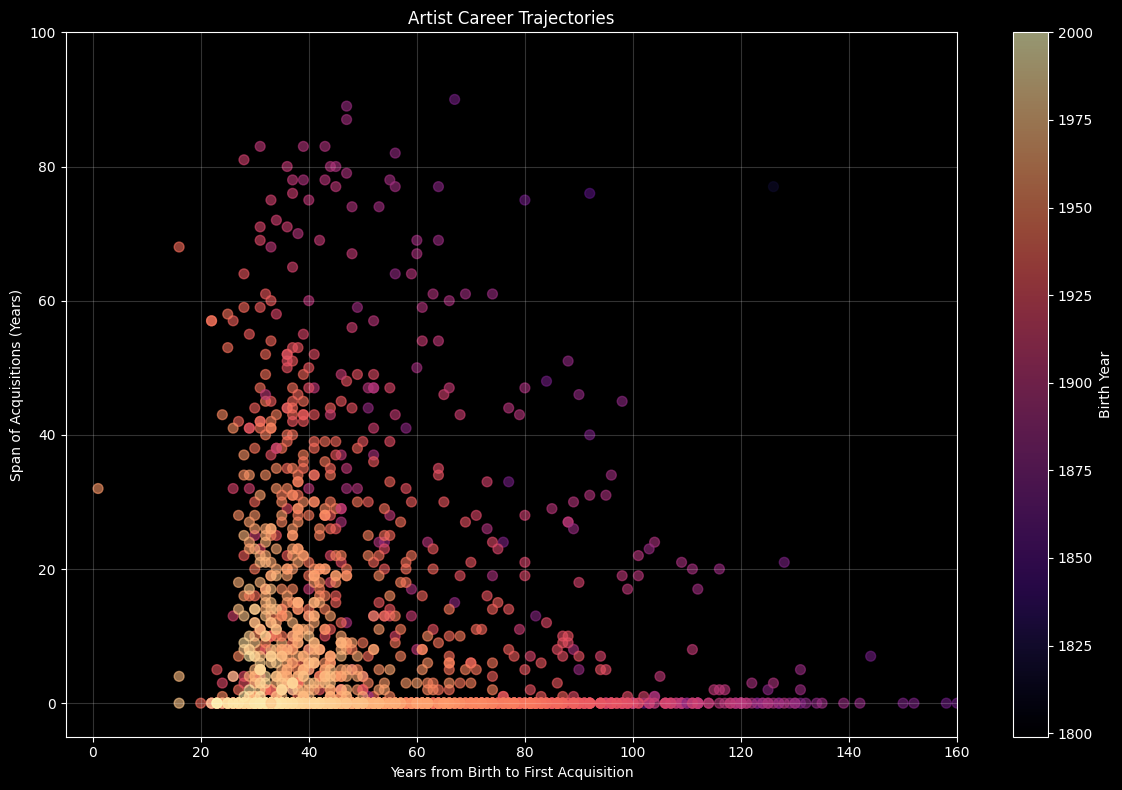


Updated Statistics:
Earliest birth year: 1799
Latest birth year: 1997
Median birth year: 1946

First Acquisition Years:
Earliest: 1932
Latest: 2024
Median: 2001

Time to First Acquisition (years):
count    2139.000000
mean       51.043011
std        23.563659
min         1.000000
25%        35.000000
50%        43.000000
75%        60.000000
max       185.000000
Name: time_to_first_acquisition, dtype: float64


In [482]:
# Drop artists with birth year 0
career_analysis_clean = career_analysis[career_analysis['BeginDate'] != 0].copy()

print("Original number of artists:", len(career_analysis))
print("Number of artists after dropping birth year 0:", len(career_analysis_clean))

# Recreate the visualization with cleaned data
plt.figure(figsize=(12, 8))
plt.style.use('dark_background')

scatter = plt.scatter(
   career_analysis_clean['time_to_first_acquisition'],
   career_analysis_clean['acquisition_span'],
   alpha=0.6,
   c=career_analysis_clean['BeginDate'],
   cmap='magma',
   s=50
)

plt.xlim(-5, 160)
plt.ylim(-5, 100)
plt.clim(1799, 2000)

plt.colorbar(scatter, label='Birth Year')
plt.title('Artist Career Trajectories')
plt.xlabel('Years from Birth to First Acquisition')
plt.ylabel('Span of Acquisitions (Years)')
plt.grid(True, alpha=0.2)

plt.tight_layout()
plt.show()

# Print updated statistics
print("\nUpdated Statistics:")
print(f"Earliest birth year: {career_analysis_clean['BeginDate'].min():.0f}")
print(f"Latest birth year: {career_analysis_clean['BeginDate'].max():.0f}")
print(f"Median birth year: {career_analysis_clean['BeginDate'].median():.0f}")

print("\nFirst Acquisition Years:")
print(f"Earliest: {career_analysis_clean['first_acquisition'].min():.0f}")
print(f"Latest: {career_analysis_clean['first_acquisition'].max():.0f}")
print(f"Median: {career_analysis_clean['first_acquisition'].median():.0f}")

print("\nTime to First Acquisition (years):")
print(career_analysis_clean['time_to_first_acquisition'].describe())